✅ UMAP completed in 15.41 seconds. Shape: (25346, 3)


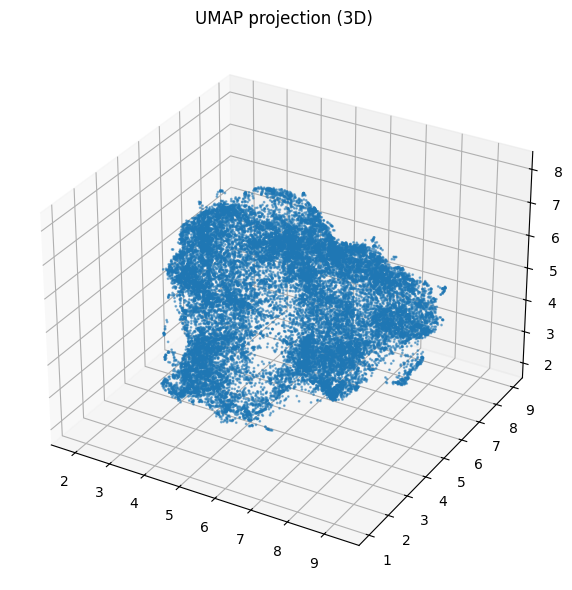

In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys
import os
import numpy as np
sys.path.append(os.path.abspath(".."))
from utils import get_spikes , TDAvis , TDAvis_shuffle , decode_circular_coordinates , plot_3d_bump_on_torus
import time
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

spike_path = os.path.abspath(os.path.join("..", "data", "grid_1.npz"))
spikes,*_ = get_spikes(spike_path)

start = time.time()
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=3,
    metric='euclidean',
    random_state=42
)
spikes = spikes[::5]

embedding = reducer.fit_transform(spikes)

end = time.time()
print(f"✅ UMAP completed in {end - start:.2f} seconds. Shape: {embedding.shape}")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], s=1, alpha=0.5)
ax.set_title("UMAP projection (3D)")
plt.tight_layout()
plt.show()

172


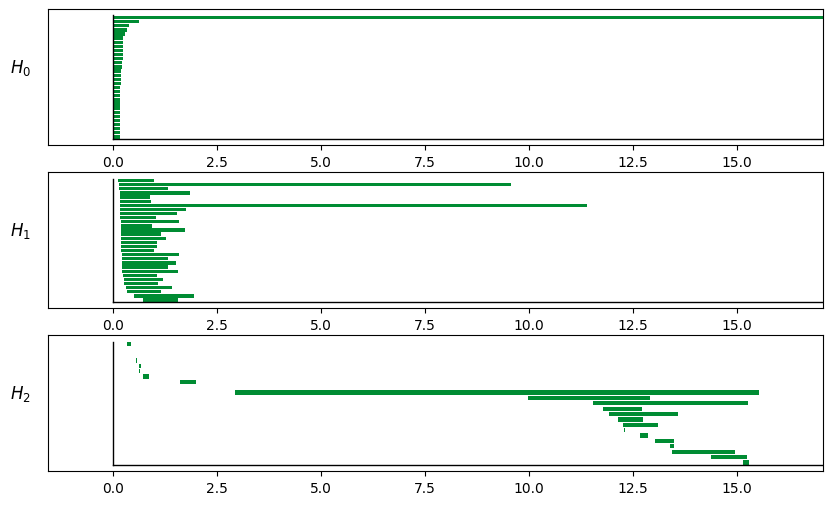

In [5]:
spike_path = os.path.abspath(os.path.join("..", "data", "grid_1.npz"))
spikes,*_ = get_spikes(spike_path)
persistence = TDAvis(spikes,maxdim=2)


===== Complete analysis, including statistical control via shuffling =====
Loading data from: C:\Users\29721\Desktop\CANN-data-analysis\data\grid_1.npz
Data loaded successfully — elapsed time: 3.3 seconds | shape: (126728, 172)
Computing persistent homology for real data...
Persistent homology computation completed - Time: 19.7s | Points: 1200

Starting shuffle analysis with 10 iterations...
Running test iteration to estimate runtime...
Persistent homology computation completed - Time: 18.9s | Points: 1200
Estimated total runtime: 3.2 minutes (0.1 hours)
Average time per iteration: 19.4 seconds
Starting 10 shuffle iterations using 4 processes...


Running shuffle analysis: 100%|██████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.18s/it]


Completed! Total elapsed time: 1.5 minutes
Average time per iteration: 9.2 seconds

Summary of shuffle-based analysis:
H0: 10 valid iterations | Mean maximum persistence: 0.8352 | 99.9th percentile: 1.1736
H1: 10 valid iterations | Mean maximum persistence: 1.9586 | 99.9th percentile: 2.8959
Generating barcode visualization...


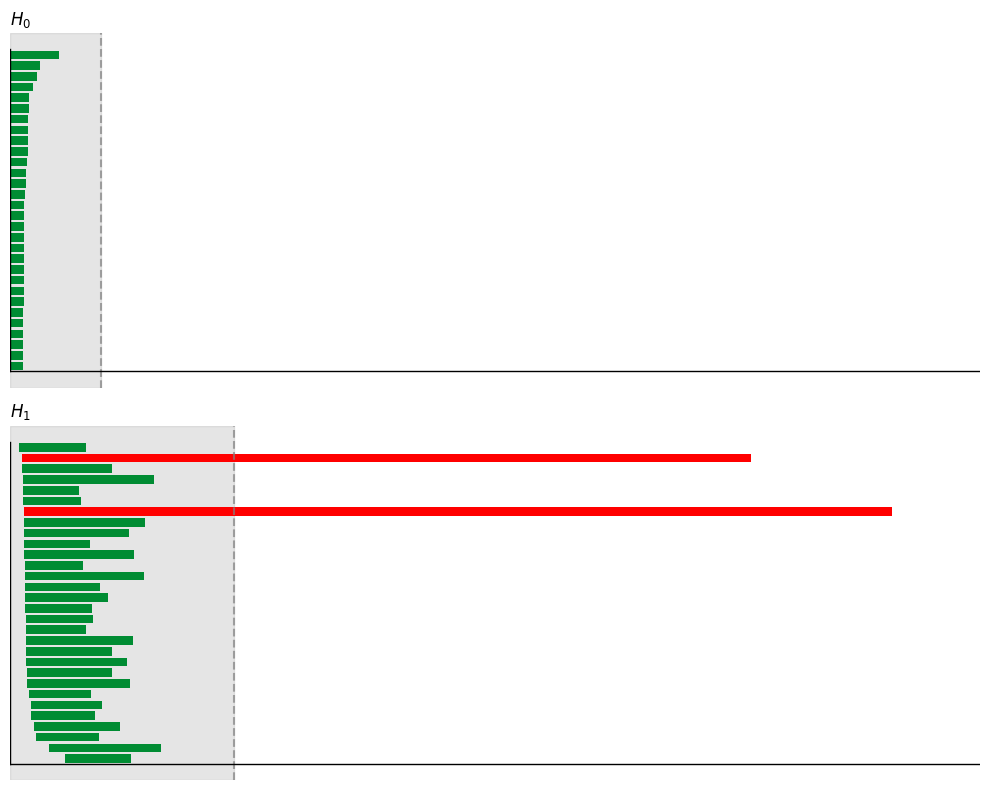


Analysis completed. Total duration: 1.9 minutes.

Results of statistical significance testing:
H0: Not significant ✗ | Maximum persistence = 0.6351 | 99.9th percentile threshold = 1.1736
H1: Significant ✓ | Maximum persistence = 11.2217 | 99.9th percentile threshold = 2.8959


In [6]:
if __name__ == "__main__":

    print("\n===== Complete analysis, including statistical control via shuffling =====")
    real_persistence, shuffle_max = TDAvis_shuffle(maxdim = 1,
        spike_path=spike_path,
        do_shuffle=True,
        num_shuffles=10,
        num_cores=5                                         
    )

    if shuffle_max:
        print("\nResults of statistical significance testing:")
        for dim in [0, 1, 2]:
            if dim < len(real_persistence['dgms']):
                # Exclude infinite bars
                valid_bars = [bar for bar in real_persistence['dgms'][dim] if not np.isinf(bar[1])]
                if valid_bars:
                    lifetimes = [bar[1] - bar[0] for bar in valid_bars]
                    if lifetimes:
                        max_lifetime = max(lifetimes)
                        threshold = np.percentile(shuffle_max.get(dim, [0]), 99.9)
                        is_significant = max_lifetime > threshold
                        sig_status = "Significant ✓" if is_significant else "Not significant ✗"
                        print(f"H{dim}: {sig_status} | "
                              f"Maximum persistence = {max_lifetime:.4f} | "
                              f"99.9th percentile threshold = {threshold:.4f}")

In [7]:
persistence_path = "Results/spikes_persistence.npz"
decode = decode_circular_coordinates(persistence_path,spike_path)

✅ GIF saved as torus_bump_day.gif


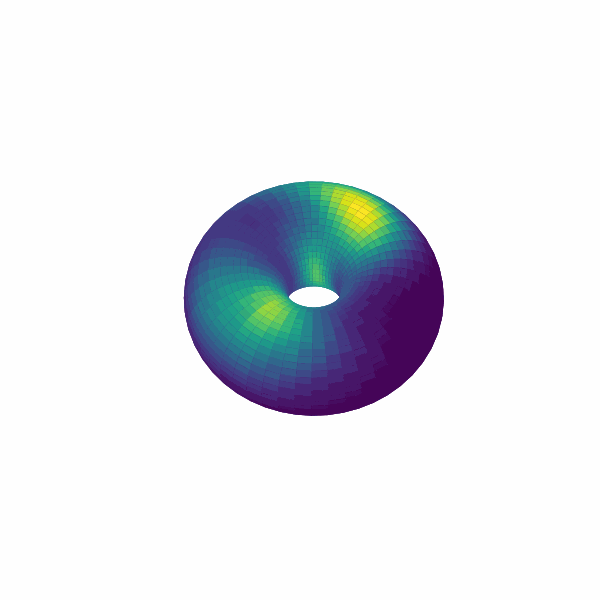

In [10]:
from IPython.display import Image
decoding_path="Results/spikes_decoding.npz"
plot_3d_bump_on_torus(decoding_path,spike_path,output_path="torus_bump_day.gif",n_frames=20)
display(Image(filename="torus_bump_day.gif"))